In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [6]:
df = pd.read_csv('users.csv')

In [7]:
df.head()

,user_id,user_name,user_review_count,user_yelp_since,friends,useful_reviews,funny_reviews,cool_reviews,n_fans,years_elite,average_stars
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",7217,1259,5994,267,2007,3.91
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,"ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",43091,13066,27281,3138,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...",3.74
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,"LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",2086,1010,1003,52,"2009,2010,2011,2012,2013",3.32
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,"enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",512,330,299,28,"2009,2010,2011",4.27
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",29,15,7,1,NaN,3.54


## Data Preprocessing 

In [8]:
df = df.rename(columns={'useful_reviews':'useful_votes', 'funny_reviews':'funny_votes', 'cool_reviews':'cool_votes'})

In [9]:
df.shape

(281334, 11)

In [10]:
df.dtypes

user_id               object
user_name             object
user_review_count      int64
user_yelp_since       object
friends               object
useful_votes           int64
funny_votes            int64
cool_votes             int64
n_fans                 int64
years_elite           object
average_stars        float64
dtype: object

In [11]:
df.isnull().sum()/len(df)*100

user_id               0.000000
user_name             0.002844
user_review_count     0.000000
user_yelp_since       0.000000
friends              27.182637
useful_votes          0.000000
funny_votes           0.000000
cool_votes            0.000000
n_fans                0.000000
years_elite          84.303710
average_stars         0.000000
dtype: float64

In [12]:
df = df.drop('years_elite',axis=1)

##### Years_Elite Column contains more than 80% null values therefore dropping it 

### Dropping Null Values

In [13]:
df = df.dropna()

In [14]:
df.isnull().sum()/len(df)*100

user_id              0.0
user_name            0.0
user_review_count    0.0
user_yelp_since      0.0
friends              0.0
useful_votes         0.0
funny_votes          0.0
cool_votes           0.0
n_fans               0.0
average_stars        0.0
dtype: float64

### Checking for duplicate values row wise

In [15]:
df.duplicated().sum()

0

### Checking for duplicate values column wise

In [16]:
df[df.duplicated(keep=False)]

,user_id,user_name,user_review_count,user_yelp_since,friends,useful_votes,funny_votes,cool_votes,n_fans,average_stars


### Converting user_yelp_since from object to datetime

In [17]:
df['user_yelp_since'] = pd.to_datetime(df['user_yelp_since'])

In [18]:
df['month'] = df['user_yelp_since'].dt.month

In [19]:
df['year'] = df['user_yelp_since'].dt.year

# EDA

In [20]:
df.head()

,user_id,user_name,user_review_count,user_yelp_since,friends,useful_votes,funny_votes,cool_votes,n_fans,average_stars,month,year
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",7217,1259,5994,267,3.91,1,2007
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,"ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",43091,13066,27281,3138,3.74,1,2009
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,"LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",2086,1010,1003,52,3.32,7,2008
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,"enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",512,330,299,28,4.27,11,2005
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",29,15,7,1,3.54,1,2007


In [21]:
num_columns = ['user_review_count', 'useful_votes', 'funny_votes', 'cool_votes', 'n_fans', 'average_stars']

In [22]:
df[num_columns].describe()

,user_review_count,useful_votes,funny_votes,cool_votes,n_fans,average_stars
count,204857.000000,204857.000000,204857.000000,204857.000000,204857.000000,204857.000000
mean,88.436021,218.494735,94.100197,140.193794,7.336869,3.840279
std,208.469751,1793.548847,1123.164132,1578.021937,51.645423,0.646306
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,12.000000,8.000000,1.000000,2.000000,0.000000,3.500000
50%,26.000000,23.000000,4.000000,6.000000,1.000000,3.910000
75%,79.000000,82.000000,19.000000,28.000000,3.000000,4.280000
max,17473.000000,206296.000000,185823.000000,199878.000000,12497.000000,5.000000


<Axes: >

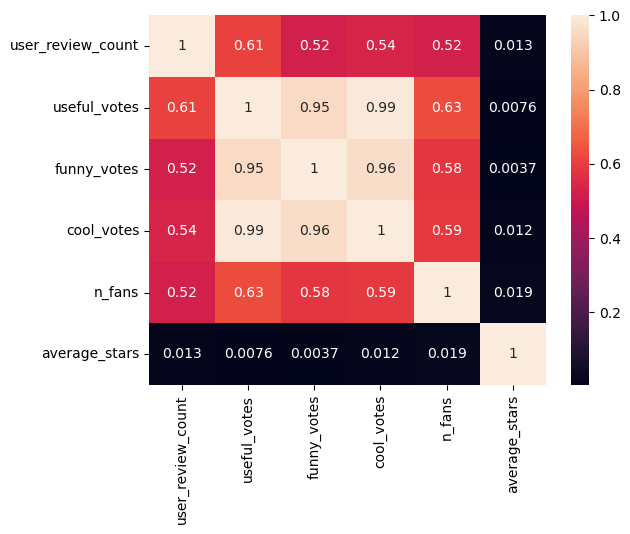

In [23]:
sns.heatmap(df[num_columns].corr(), annot=True)

### Number of Reviews by Month

In [24]:
monthly_reviews = df.groupby('month')['user_review_count'].count().reset_index(name = 'count')
fig = px.line(monthly_reviews, x = 'month', y = 'count', title = 'Number of Reviews by Month')
for i, row in monthly_reviews.iterrows():
    fig.add_annotation(x = row['month'], y = row['count'], text=str(row['count']), showarrow=True, arrowhead=1)
fig.show()

### Outlier Detection

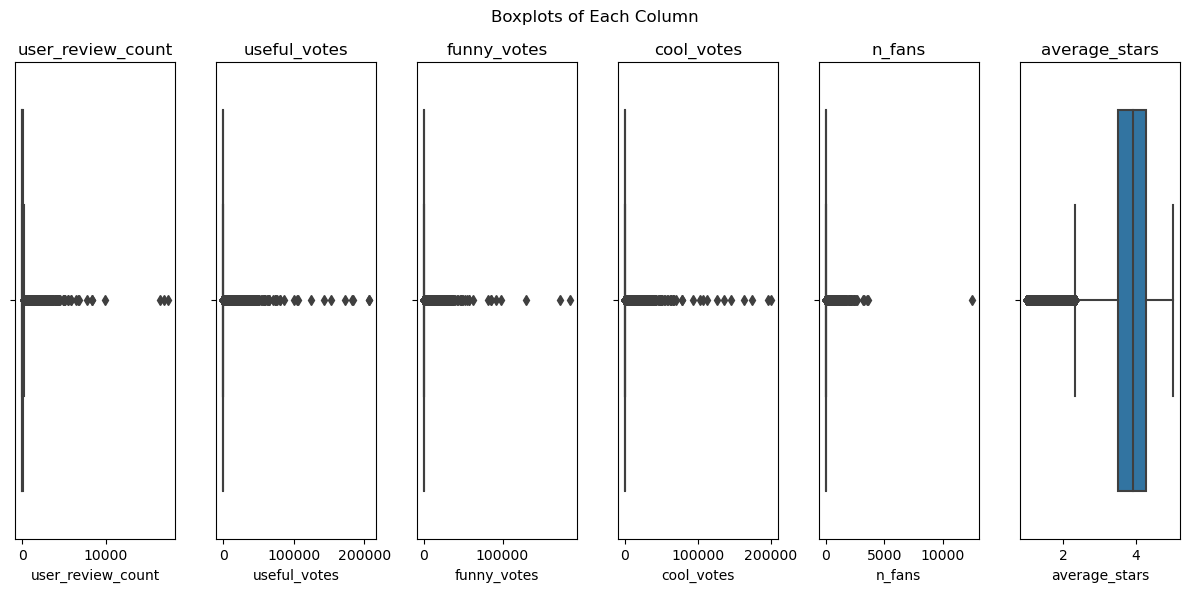

In [25]:
fig, axes = plt.subplots(1, len(num_columns), figsize=(12, 6))

for i, col in enumerate(num_columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

plt.suptitle('Boxplots of Each Column')
plt.tight_layout()
plt.show()

### Numeric Features Grouped by User Average Star Rating 

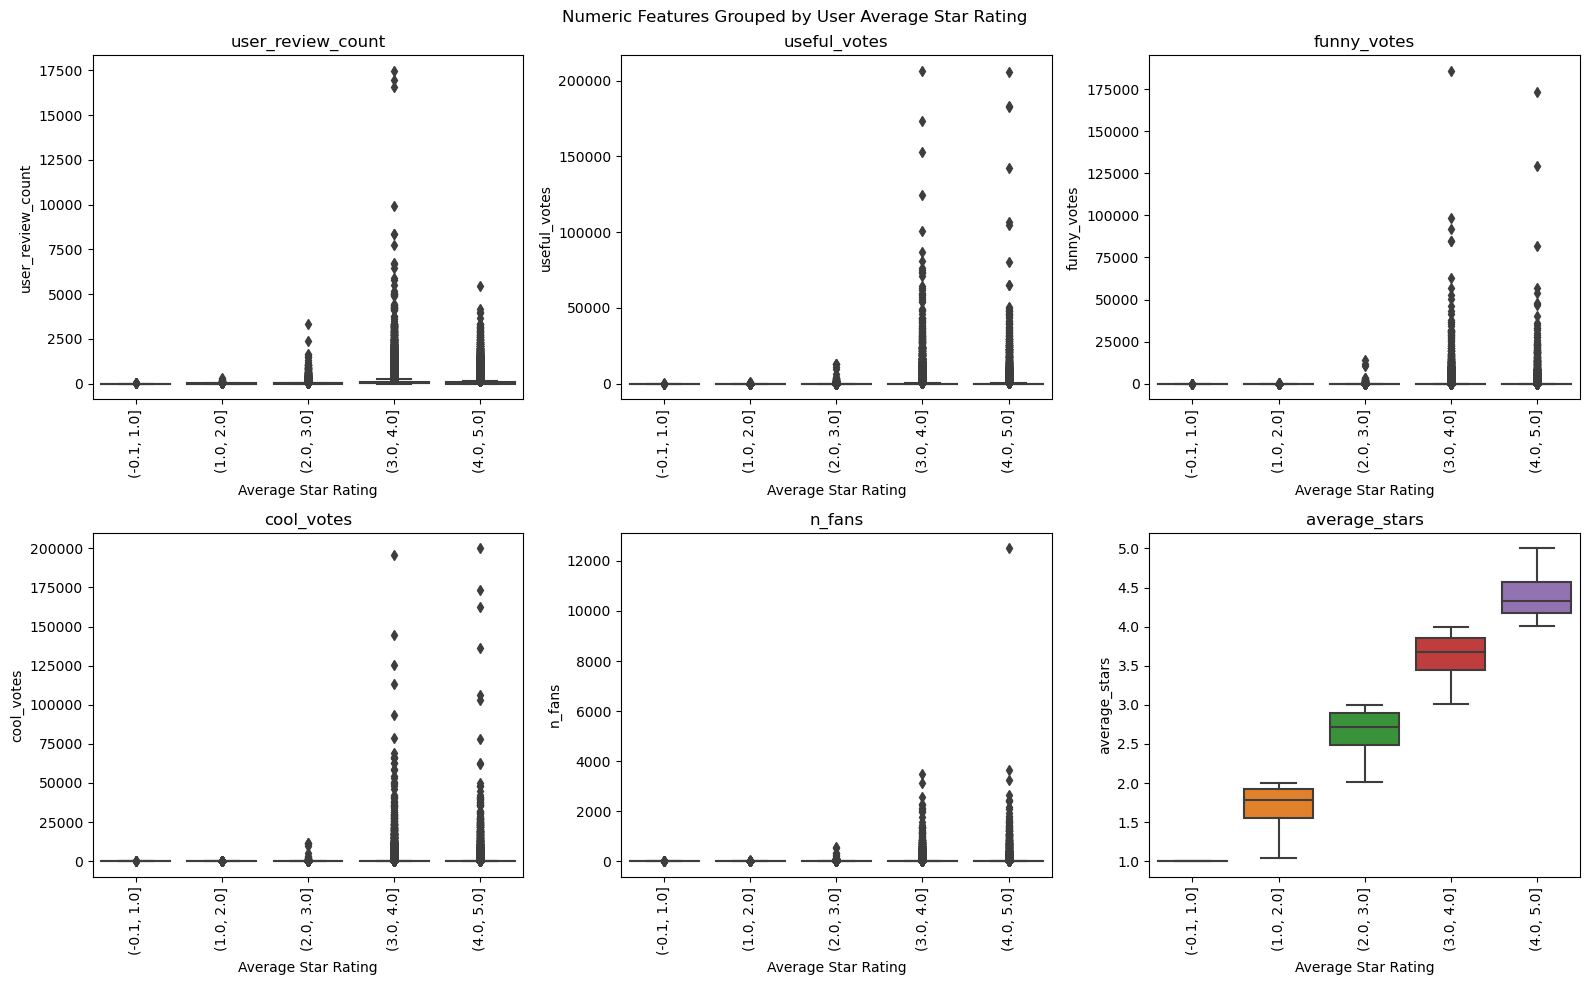

In [26]:
user_stars_groups = df.groupby(pd.cut(df['average_stars'], bins=[-0.1, 1, 2, 3, 4, 5]))[num_columns].describe()

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for i, col in enumerate(num_columns):
    sns.boxplot(x=pd.cut(df['average_stars'], bins=[-0.1, 1, 2, 3, 4, 5]), y=df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('Average Star Rating')
    axes[i].tick_params(axis='x', rotation=90)

plt.suptitle('Numeric Features Grouped by User Average Star Rating')
plt.tight_layout()
plt.show()

### Normalized Trend of Number of Reviews by Month, Compared across Years

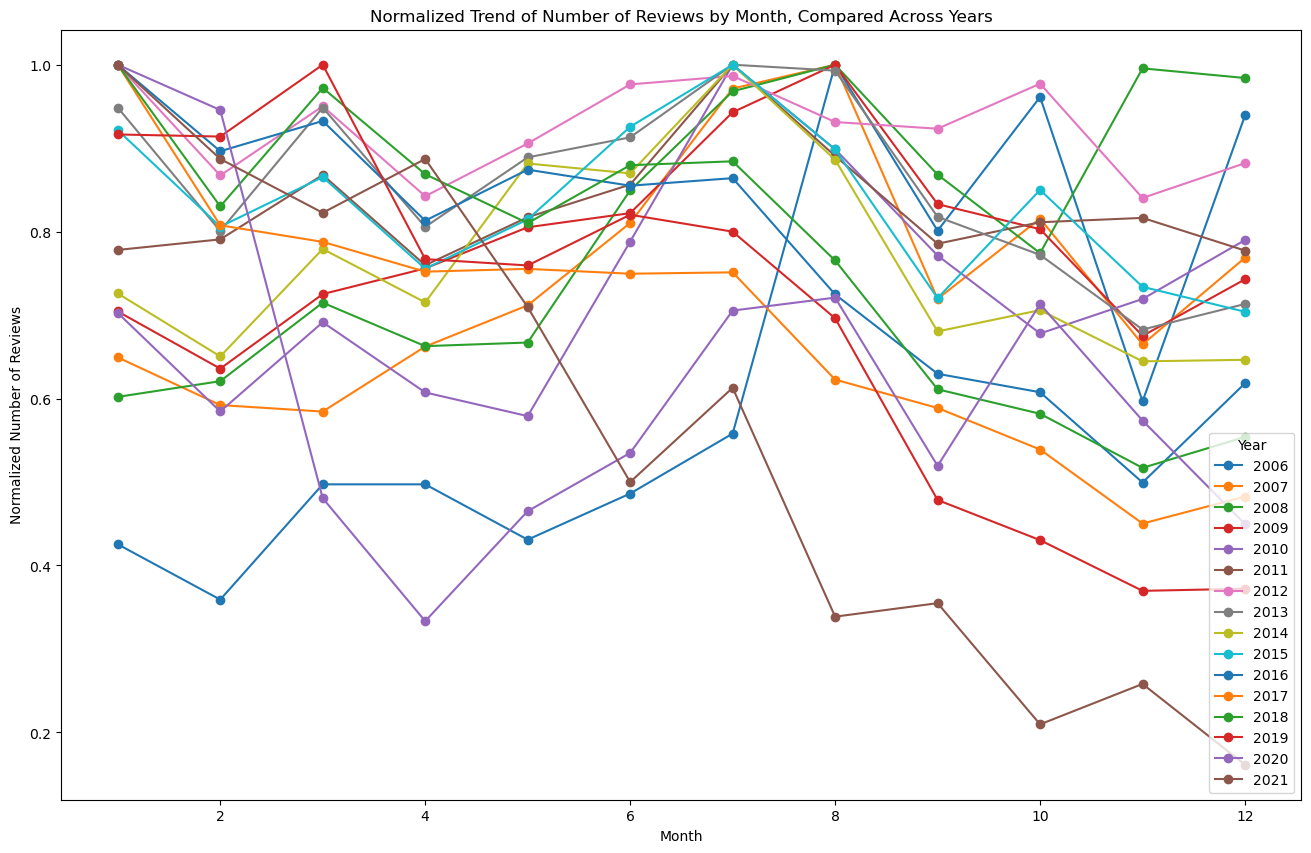

In [30]:
df = df[(df['year'] >= 2006) & (df['year'] <= 2021)]
reviews_by_month = df.groupby(['year', 'month']).size().unstack()
reviews_by_month = reviews_by_month.div(reviews_by_month.max(axis=1), axis=0)
reviews_by_month = reviews_by_month.transpose()
fig, ax = plt.subplots(figsize=(16, 10))
reviews_by_month.plot(marker='o', ax=ax)

plt.xlabel('Month')
plt.ylabel('Normalized Number of Reviews')
plt.title('Normalized Trend of Number of Reviews by Month, Compared Across Years')
plt.legend(title='Year', loc='lower right')
plt.show()